In [ ]:
# Step 1: Upload the datasets to Google Colab
from google.colab import files
uploaded = files.upload()


Saving Bangladeshi_ingredients_calories.csv to Bangladeshi_ingredients_calories.csv
Saving Bangladeshi_recipes.csv to Bangladeshi_recipes.csv


In [ ]:
# Step 2: Load the datasets
import pandas as pd
import re

In [ ]:
# Load the datasets
ingredients_df = pd.read_csv('Bangladeshi_ingredients_calories.csv')
recipes_df = pd.read_csv('Bangladeshi_recipes.csv')

In [ ]:
# Inspect the columns of the ingredients_df to identify the correct column names
print(ingredients_df.columns)
print(recipes_df.columns)

Index(['ingredient', 'calories_per_gram'], dtype='object')
Index(['recipe_name', 'ingredients'], dtype='object')


In [ ]:
# Step 3: Parse the ingredients
def parse_ingredients(ingredients_str):
    ingredients_list = ingredients_str.split(', ')
    parsed_ingredients = []
    for item in ingredients_list:
        match = re.match(r'(.+?)\:(\d+)(g|ml)', item)
        if match:
            name, quantity, unit = match.groups()
            if unit == 'g':  # Only consider grams
                parsed_ingredients.append((name.strip(), int(quantity)))
            else:
                print(f"Warning: Ingredient {name} has unsupported unit {unit}")
        else:
            print(f"Warning: Could not parse ingredient: {item}")
    return parsed_ingredients

In [ ]:
# Apply the function to the recipes dataset
recipes_df['parsed_ingredients'] = recipes_df['ingredients'].apply(parse_ingredients)

# Print the first few rows of the parsed_ingredients column
print(recipes_df['parsed_ingredients'].head())

0    [(Jackfruit (Kathal), 107), (Pear (Nashpati), ...
1    [(Cocoa Powder, 57), (Khoya, 73), (Papaya (Pep...
2    [(Sugar (Chini), 100), (Corn Syrup, 189), (Jac...
3    [(Cocoa Powder, 121), (Pear (Nashpati), 89), (...
4    [(Pomegranate (Dalim), 167), (Buttermilk (Ghol...
Name: parsed_ingredients, dtype: object


In [ ]:
# Expand the recipes dataframe for merging
recipes_expanded = recipes_df.explode('parsed_ingredients').reset_index(drop=True)
print(recipes_expanded.head())

        recipe_name                                        ingredients  \
0  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
1  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
2  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
3  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   
4  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   

          parsed_ingredients  
0  (Jackfruit (Kathal), 107)  
1      (Pear (Nashpati), 85)  
2               (Lychee, 76)  
3         (Cocoa Powder, 57)  
4                (Khoya, 73)  


In [ ]:
# Split the tuple into separate columns
recipes_expanded[['ingredient_name', 'quantity(gram)']] = pd.DataFrame(recipes_expanded['parsed_ingredients'].tolist(), index=recipes_expanded.index)
print(recipes_expanded.head())

        recipe_name                                        ingredients  \
0  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
1  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
2  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
3  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   
4  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   

          parsed_ingredients     ingredient_name  quantity(gram)  
0  (Jackfruit (Kathal), 107)  Jackfruit (Kathal)             107  
1      (Pear (Nashpati), 85)     Pear (Nashpati)              85  
2               (Lychee, 76)              Lychee              76  
3         (Cocoa Powder, 57)        Cocoa Powder              57  
4                (Khoya, 73)               Khoya              73  


In [ ]:
# Step 4: Merge and calculate calories
# Rename columns in ingredients_df if necessary
ingredients_df.rename(columns={'ingredient': 'ingredient_name'}, inplace=True)
print(ingredients_df.columns)

Index(['ingredient_name', 'calories_per_gram'], dtype='object')


In [ ]:
# Merge with ingredients_df
merged_df = pd.merge(recipes_expanded, ingredients_df, on='ingredient_name', how='left')
print(merged_df.head())

        recipe_name                                        ingredients  \
0  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
1  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
2  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
3  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   
4  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   

          parsed_ingredients     ingredient_name  quantity(gram)  \
0  (Jackfruit (Kathal), 107)  Jackfruit (Kathal)             107   
1      (Pear (Nashpati), 85)     Pear (Nashpati)              85   
2               (Lychee, 76)              Lychee              76   
3         (Cocoa Powder, 57)        Cocoa Powder              57   
4                (Khoya, 73)               Khoya              73   

   calories_per_gram  
0               0.94  
1               0.57  
2               0.66  
3               2.29  
4               4.27  


In [ ]:
# Calculate total calories for each ingredient in the recipe
merged_df['ingredient_calories'] = merged_df['quantity(gram)'] * merged_df['calories_per_gram']
print(merged_df.head())

        recipe_name                                        ingredients  \
0  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
1  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
2  Dessert Recipe 1  Jackfruit (Kathal):107g, Pear (Nashpati):85g, ...   
3  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   
4  Dessert Recipe 2    Cocoa Powder:57g, Khoya:73g, Papaya (Pepe):105g   

          parsed_ingredients     ingredient_name  quantity(gram)  \
0  (Jackfruit (Kathal), 107)  Jackfruit (Kathal)             107   
1      (Pear (Nashpati), 85)     Pear (Nashpati)              85   
2               (Lychee, 76)              Lychee              76   
3         (Cocoa Powder, 57)        Cocoa Powder              57   
4                (Khoya, 73)               Khoya              73   

   calories_per_gram  ingredient_calories  
0               0.94               100.58  
1               0.57                48.45  
2             

In [ ]:
# Group by recipe name to get the total calories per recipe
total_calories_df = merged_df.groupby('recipe_name').agg({'ingredient_calories': 'sum'}).reset_index()
total_calories_df.rename(columns={'ingredient_calories': 'total_calories'}, inplace=True)
print(total_calories_df.head())

            recipe_name  total_calories
0       Beef Kala Bhuna         1384.85
1         Chicken Roast         2283.15
2  Chicken Tikka Masala         1647.65
3   Chingri Malai Curry         1015.70
4      Dessert Recipe 1          199.19


### Machine Learning Approach

In [ ]:
# Prepare the dataset for machine learning
# One-hot encode the ingredients and create a wide format dataframe
ingredients_pivot = merged_df.pivot_table(index='recipe_name', columns='ingredient_name', values='quantity(gram)', fill_value=0)
ingredients_pivot = ingredients_pivot.reset_index()

In [ ]:
# Merge with the total calories
ml_dataset = pd.merge(ingredients_pivot, total_calories_df, on='recipe_name')

In [ ]:
# Split the dataset into features and target
X = ml_dataset.drop(columns=['recipe_name', 'total_calories'])
y = ml_dataset['total_calories']

In [ ]:
# Split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train multiple machine learning models and evaluate them
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [ ]:
# Print model performances
print(f"Linear Regression MSE: {lr_mse}")
print(f"Decision Tree Regressor MSE: {dt_mse}")
print(f"Random Forest Regressor MSE: {rf_mse}")

Linear Regression MSE: 15.74769346811121
Decision Tree Regressor MSE: 154397.34775049752
Random Forest Regressor MSE: 77972.48674586437


In [ ]:
print(f"Linear Regression R^2: {lr_r2}")
print(f"Decision Tree Regressor R^2: {dt_r2}")
print(f"Random Forest Regressor R^2: {rf_r2}")

Linear Regression R^2: 0.9999292352393784
Decision Tree Regressor R^2: 0.30619100655551135
Random Forest Regressor R^2: 0.649618252297099


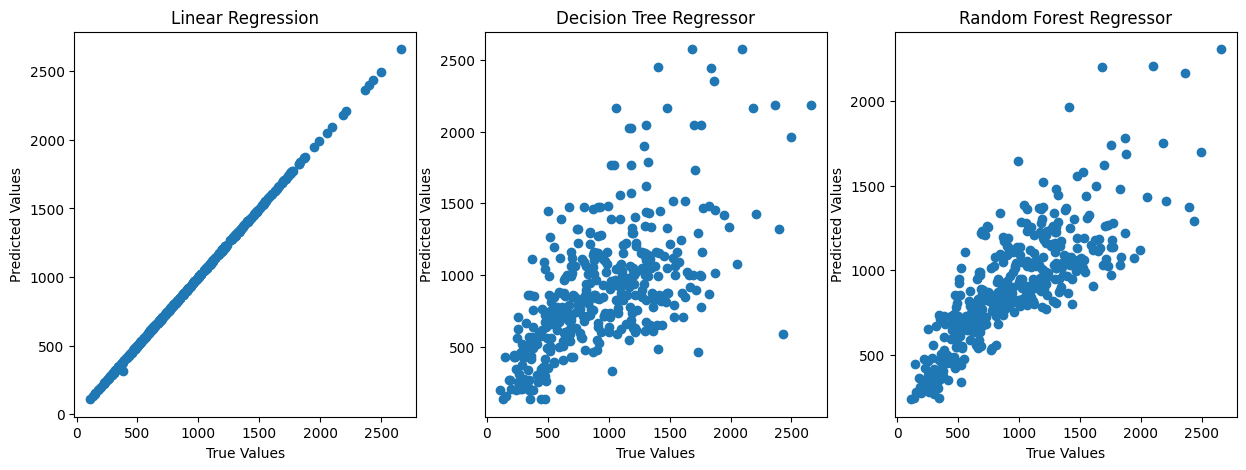

In [ ]:
# Scatter Plot
import matplotlib.pyplot as plt

# Create a figure with three subplots for scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the performance of each model
axes[0].scatter(y_test, lr_predictions)
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Linear Regression")

axes[1].scatter(y_test, dt_predictions)
axes[1].set_xlabel("True Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title("Decision Tree Regressor")

axes[2].scatter(y_test, rf_predictions)
axes[2].set_xlabel("True Values")
axes[2].set_ylabel("Predicted Values")
axes[2].set_title("Random Forest Regressor")

# Show the plot
plt.show()

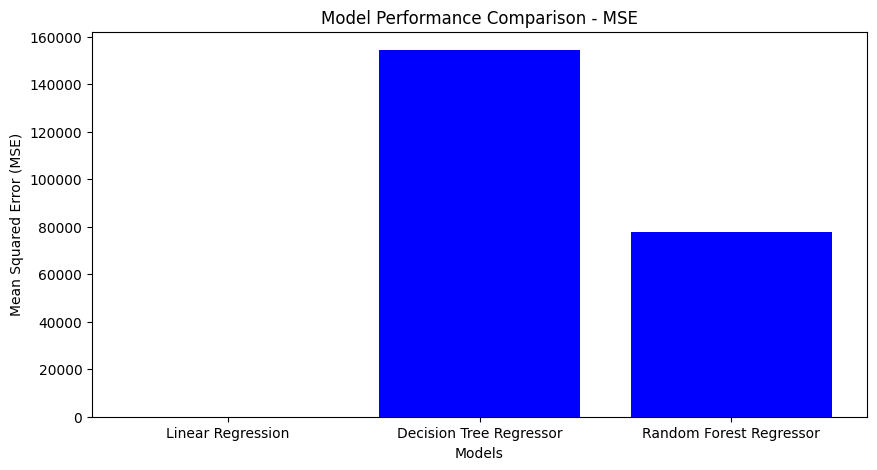

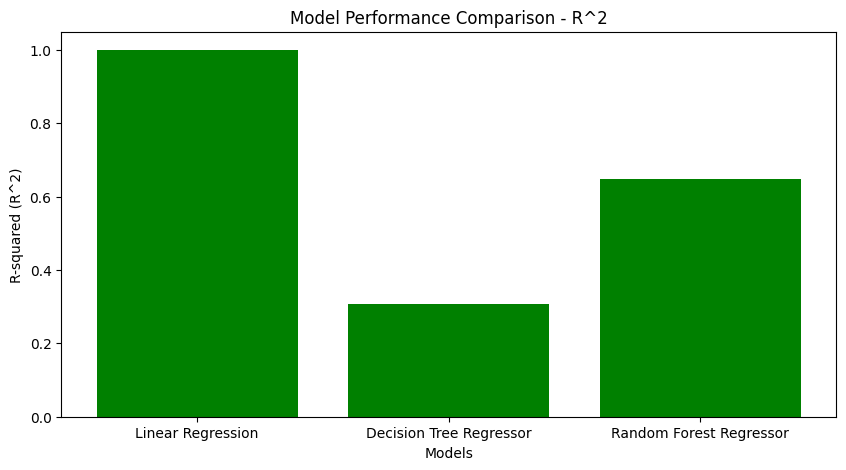

In [ ]:
# Bar Chart
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']

# Create a list of MSE values
mse_values = [lr_mse, dt_mse, rf_mse]
r2_values = [lr_r2, dt_r2, rf_r2]

# Create a bar chart for MSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='blue')
plt.title('Model Performance Comparison - MSE')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# Create a bar chart for R^2
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='green')
plt.title('Model Performance Comparison - R^2')
plt.xlabel('Models')
plt.ylabel('R-squared (R^2)')
plt.show()

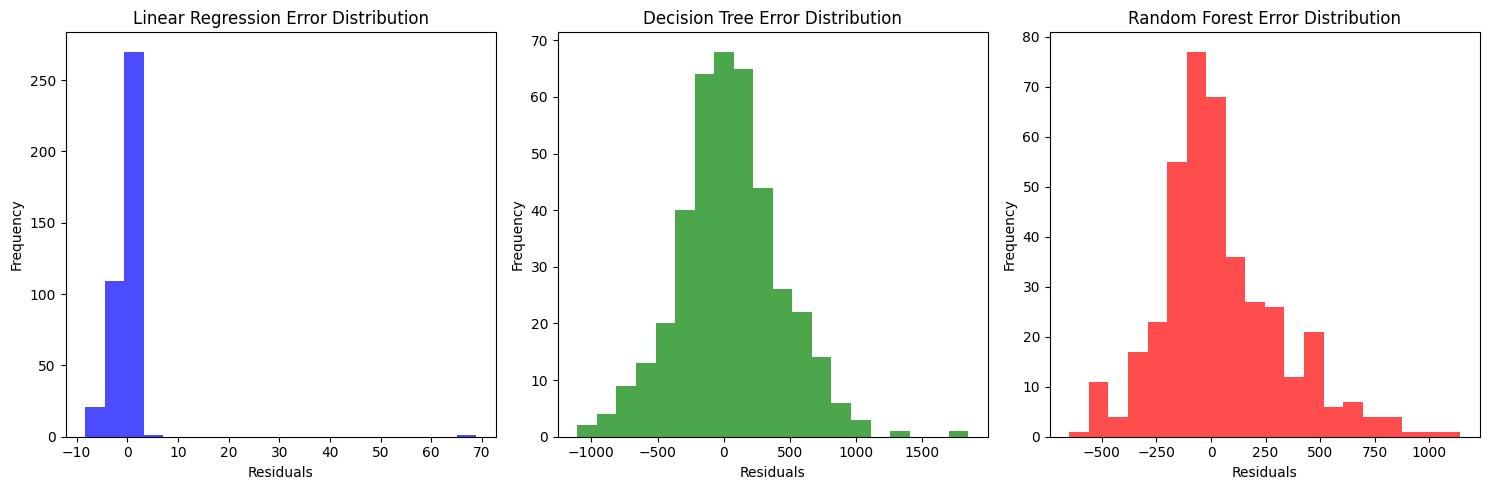

In [ ]:
# Error Distribution Plot

# Calculate residuals for each model (assuming you have predictions and true values)
lr_residuals = y_test - lr_predictions
dt_residuals = y_test - dt_predictions
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(lr_residuals, bins=20, color='blue', alpha=0.7)
plt.title('Linear Regression Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(dt_residuals, bins=20, color='green', alpha=0.7)
plt.title('Decision Tree Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rf_residuals, bins=20, color='red', alpha=0.7)
plt.title('Random Forest Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

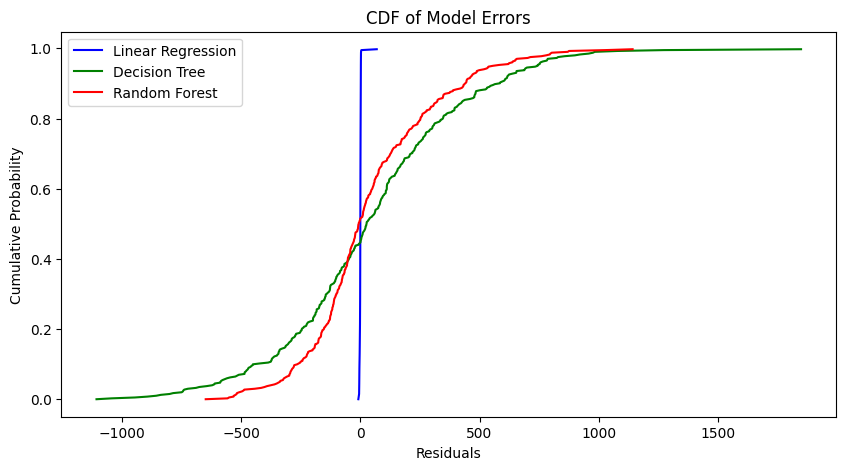

In [ ]:
#Cumulative Distribution Function (CDF) of Errors

import numpy as np

plt.figure(figsize=(10, 5))
for residuals, model_name, color in zip([lr_residuals, dt_residuals, rf_residuals],
                                        ['Linear Regression', 'Decision Tree', 'Random Forest'],
                                        ['blue', 'green', 'red']):
    sorted_residuals = np.sort(residuals)
    yvals = np.arange(len(sorted_residuals))/float(len(sorted_residuals))
    plt.plot(sorted_residuals, yvals, label=model_name, color=color)

plt.title('CDF of Model Errors')
plt.xlabel('Residuals')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [ ]:
# Based on the mean squared error values, the model with the lowest MSE is the best performing model.
best_model_index_mse = mse_values.index(min(mse_values))
best_model_mse = model_names[best_model_index_mse]

# Based on the R-squared values, the model with the highest R^2 is the best performing model.
best_model_index_r2 = r2_values.index(max(r2_values))
best_model_r2 = model_names[best_model_index_r2]

print(f"The best model based on MSE is {best_model_mse} with an MSE of {min(mse_values)}")
print(f"The best model based on R^2 is {best_model_r2} with an R^2 of {max(r2_values)}")

The best model based on MSE is Linear Regression with an MSE of 15.74769346811121
The best model based on R^2 is Linear Regression with an R^2 of 0.9999292352393784


In [ ]:
# Define best_model based on the lowest MSE
model_dict = {'Linear Regression': lr, 'Decision Tree Regressor': dt, 'Random Forest Regressor': rf}
best_model = model_dict[model_names[best_model_index_mse]]
print(best_model)

LinearRegression()


In [ ]:
# Now use best_model in the function
def predict_calories(recipe_name):
    if recipe_name in recipes_df['recipe_name'].values:
        # Filter the recipe ingredients
        recipe_ingredients = recipes_df[recipes_df['recipe_name'] == recipe_name]['parsed_ingredients'].values[0]
        # Create a DataFrame for the new recipe
        new_recipe_df = pd.DataFrame(recipe_ingredients, columns=['ingredient_name', 'quantity'])
        # Pivot to match the training data format
        new_recipe_pivot = new_recipe_df.pivot_table(index=None, columns='ingredient_name', values='quantity', fill_value=0)
        # Reindex to match the model's training data columns
        new_recipe_pivot = new_recipe_pivot.reindex(columns=X.columns, fill_value=0)
        # Predict calories
        predicted_calories = best_model.predict(new_recipe_pivot)
        return predicted_calories

In [ ]:
# Example usage
recipe_name = 'Beef Kala Bhuna'
calories = predict_calories(recipe_name)
print(f'Predicted calories for {recipe_name}: {calories}')

Predicted calories for Beef Kala Bhuna: [1384.85265139]
